# SVM Suport Vector Machine oder auch Suport Vector Classifier

Klassen trennen mit Hilfe von Hyperebenen

**in CMD folgende Pakete instalieren ins Enviorment:**

In [1]:
pip install pandas numpy scikit-learn

     --------------------------------------- 11.2/11.2 MB 34.4 MB/s eta 0:00:00
     ------------------------------------- 301.8/301.8 kB 18.2 MB/s eta 0:00:00
     --------------------------------------- 14.9/14.9 MB 36.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2
Note: you may need to restart the kernel to use updated packages.


## Mögliche Ziele für die Klassifikation
Je nach deinem Anwendungsfall könnten auch andere Zielgrößen verwendet werden:

- Ansatz für Labels: Farben klustern mit KMeans, dann die Cluster als Labels nehmen

Dominante Farbe als Klasse:

In [2]:
df["Label"] = df[["Red", "Green", "Blue"]].idxmax(axis=1)

NameError: name 'df' is not defined


- Gruppierung nach Höhenbereichen (Z)

In [ ]:
df["Label"] = pd.cut(df["Z"], bins=3, labels=["tief", "mittel", "hoch"])



- Klassifikation nach Scanrichtung (z. B. Z_dir > 0.9 = “nach oben”)


In [ ]:
df["Label"] = df["Z_dir"].apply(lambda z: "nach oben" if z > 0.9 else "sonst")

- Zielvariable sind unsere definierten Klassen


In [ ]:

df["Label"] = df[["Bäume", "Ground", "Daecher", "..."]].idxmax(axis=1) # Zielklassen von uns!!!

## SVM - Implementiert




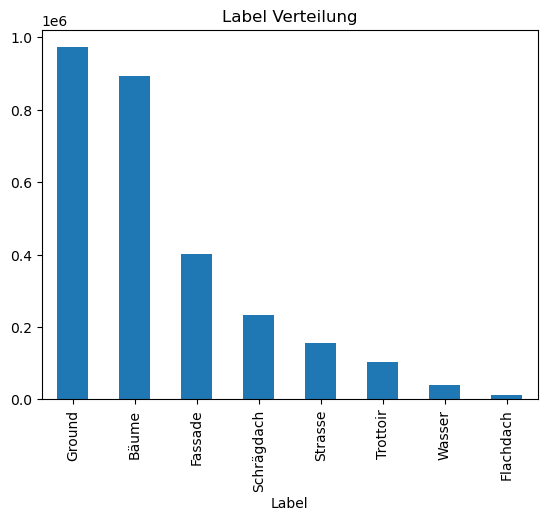

KeyError: 'LabelEncoder'

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#TODO Normalisierte einzelne Klassenfiles mergen und neue Spalte Klasse anlegen "Label"
# "S:\HABG\E1364_IGEO_BTH\E1364_BTH4\06_Auswertung\01_Klassifizierung\250327_SVM"

# 1. Daten laden
df = pd.read_csv("PW_Klass_P3A1_gesamt_normalisiert.txt", sep=";", header=None) # Normalisierte Werte + Klassenzugehörigkeit
df.columns = [
    "X", "Y", "Z",
    "Red", "Green", "Blue",
    "Hue (0-1)", "Saturation (0-1)", "Value (0-1)",
    "X_dir", "Y_dir", "Z_dir" , "Label" #TODO kontrolle aufbau von .txt i.o. 
]

# 2. Zielvariable Zielklassen von uns!!!
df["LabelEncoded"] = df["Label"].astype("category").cat.codes



# Optional: Visualisierung der Label-Verteilung
df["Label"].value_counts().plot(kind='bar', title="Label Verteilung")
plt.show()

# 3. Features und Ziel definieren
X = df[["X", "Y", "Z", "Red", "Green", "Blue", "Hue (0-1)", "Saturation (0-1)", "Value (0-1)", "X_dir", "Y_dir", "Z_dir"]]
y = df["LabelEncoded"]

# 4. Feature-Skalierung
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Daten aufteilen in Training/Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# 6. SVC-Modell trainieren
model = SVC(kernel='rbf', C=1.0, gamma=0.01) # kernel: weitere
model.fit(X_train, y_train)

# 7. Vorhersagen & Bewertung
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


# Übersicht: SVM Kernel-Funktionen (`sklearn.SVC`)

Die **Kernel-Funktion** ist der zentrale Mechanismus von SVMs. Sie erlaubt es, nicht-linear trennbare Daten in höhere Dimensionen zu projizieren, um dort eine lineare Trennung zu ermöglichen – ohne diese Dimension explizit zu berechnen (→ *Kernel-Trick*).

---

## Wichtige Kernel in `scikit-learn`

| Kernel        | Beschreibung                                                                 | Parameter                              | Empfohlen bei…                                                                 |
|---------------|------------------------------------------------------------------------------|----------------------------------------|---------------------------------------------------------------------------------|
| `linear`      | Klassische lineare Trennung im Eingaberaum.                                  | `C`                                    | Wenn die Daten **linear trennbar** sind oder viele Features haben.             |
| `rbf`         | Radial Basis Function (Gaußscher Kernel). Nichtlineare Trennung.             | `C`, `gamma`                           | **Standard-Kernel** für die meisten Klassifikationsprobleme.                   |
| `poly`        | Polynomkernel: \( K(x, y) = (\gamma \cdot x^T y + r)^d \)                     | `C`, `degree`, `gamma`, `coef0`        | Wenn du eine **polynomartige Entscheidungsgrenze** vermutest.                 |
| `sigmoid`     | Sigmoidkernel wie in neuronalen Netzen: \( \tanh(\gamma x^T y + r) \)         | `C`, `gamma`, `coef0`                  | Selten verwendet, ähnelt einem kleinen neuronalen Netz.                        |
| `precomputed` | Du übergibst direkt eine **Kernel-Matrix** (Ähnlichkeitsmatrix).             | —                                      | Wenn du die Ähnlichkeiten selbst berechnest (z. B. mit eigener Distance-Maß). |

---

## Parameter kurz erklärt

- **`C`** (Regulierung):  
  - Hoch = strikte Trennung, weniger Toleranz für Fehler  
  - Niedrig = weichere Trennung, robust gegen Ausreißer

- **`gamma`** (bei `rbf`, `poly`, `sigmoid`):  
  - Klein = weiter Blick (glatte Grenze)  
  - Groß = enger Blick (komplizierte Grenze)

- **`degree`**:  
  - Nur bei `poly`, bestimmt den Grad des Polynoms

- **`coef0`**:  
  - Relevanter Bias-Term bei `poly` und `sigmoid`

---

## Kernel-Wirkung (vereinfacht)

| Kernel     | Entscheidungsgrenze              | Beispielhafte Trennung (symbolisch)  |
|------------|----------------------------------|--------------------------------------|
| `linear`   | Gerade                           | 🔴⚫⚫⚫🚧⚫⚫⚫🔴                         |
| `rbf`      | Kreisförmig / komplex            | 🔴⚫⚫🔴⚫🔴⚫🔴⚫                         |
| `poly`     | Kurvig (z. B. parabelartig)      | ⚫🔴⚫🔴⚫🔴⚫🔴⚫                         |

---

## Empfehlung

- Starte mit `rbf`, es ist am flexibelsten.
- Teste verschiedene `C` und `gamma` Werte (z. B. mit GridSearch).
- `linear` ist ideal für sehr große oder spärlich besetzte Feature-Vektoren.
